## Data Analytics
### Prof: Hugo Franco
### Inferential Statistics II: Hypothesis testing


__Review:__
For a confidence level of 95% (i.e. $\alpha=0.05$) the value of $z_{\alpha/2}\approx 1.96$

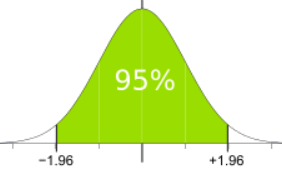

__Test statistic:__ A test statistic $\theta
$ is a result obtained from the sample and fulfilling the following conditions:

* Provide relevant empirical information on the claim proposed in $H_0$.
* Have a known sampling distribution

__Types of tests__
* __Parametric test:__ that having a known distribution, statements are made about the parameters of that distribution.
* __Non-parametric tests:__ the statements are not made according to the distribution of the observations, which is unknown a priori.

__Types of hypotheses__
* __Simple hypotheses:__ the hypothesis assigns a single value to the unknown parameter, $H: \theta = \theta_0$
* __Composite hypotheses:__ the hypothesis assigns several possible values to the unknown parameter, $H: \theta \in (\theta_1, \theta_2)$

__Rejection and non-rejection regions__

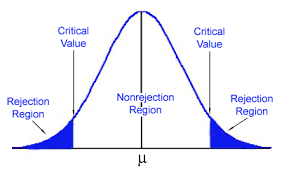

The null hypothesis is rejected if and only if the _statistic_ selected for the hypothesis testing lies in the rejection region. The $p$-value is the area under the curve contained in the rejection region


__Two-tailed tests:__ if the alternative hypothesis corresponds to a critical region “on both sides” of the parameter value, it is said that the test is two-tailed or two-tailed. $H_0$ is rejected if the contrast statistic falls in the critical zone, that is, if the test statistic takes a value so large or so small that the probability of obtaining a value as extreme or more than the one found is less than $\alpha / 2$. 

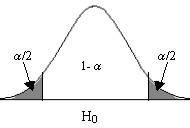 

Bilateral test, $H_0: \theta = \theta_0\qquad H_a = \theta \neq \theta_0$

__One-sided test:__ if the alternative hypothesis corresponds to a critical region “on one side of the parameter value”, it is said that the test is one-sided or one-tailed. $H_0$ is rejected if the contrast statistic falls in the critical zone, that is, if it takes such a large value that the probability of obtaining a value like that or greater is less than $\alpha$. 

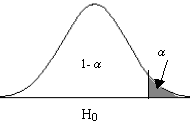 
<br>Right tail unilateral test, $H_0: \theta \le \theta_0\qquad H_a:  \theta > \theta_0$

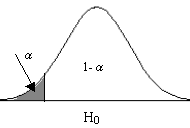 
<br>Left tail unilateral test, $H_0: \theta \ge \theta_0\qquad H_a: \theta < \theta_0$

#### Student's $t$-test
In real-life problems, the $Z$-score is not easy to compute since $\sigma^2$ is not known or accessible, so the associated $Z$-test is not used. Instead, the Student's $t$-test is performed, $t=\frac{Z}{s}$. Given $s^2= \frac{\sigma^2}{n}$, this test is defined in terms of the corresponding statistic:
$$\frac{\bar{X}-\mu}{\hat{\sigma}/\sqrt{n}}$$ where $\hat{\sigma}$ is an estimation of the standard deviation of the mean (it is usually notated also as $Z$).

#### The $p$-value
The $p$-value is a probability but its meaning is hard to define, so it is often expressed by its utility: if  $p < \alpha$, it is commonly assumed that the null hypothesis is rejected, so the alternative hypothesis could hold and the observations are significant. On the other hand, if $p > \alpha$, the null hypothesis cannot be rejected and the observations could not support significant experimental results.

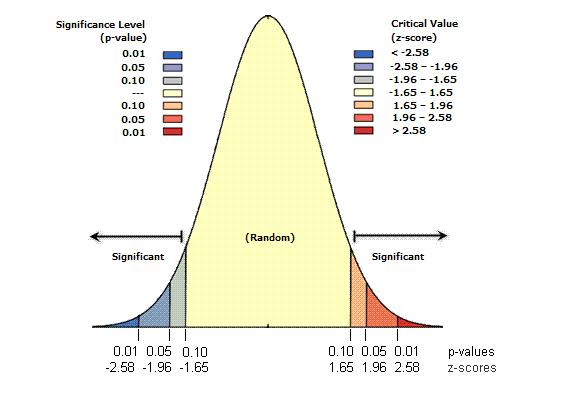

### Examples

For the following examples, the _pushups_ data will be used 


In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

dataframe2=pd.read_csv("pushups.txt", sep="\t")
dataframe2.info() 
dataframe2["Push-ups"].describe()

C:\Users\Hugo\anaconda_3\envs\DAnalytics\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Push-ups  75 non-null     int64 
 1   sex       75 non-null     object
 2   sport     75 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ KB


count    75.000000
mean     50.106667
std       5.978731
min      35.000000
25%      48.000000
50%      50.000000
75%      54.000000
max      60.000000
Name: Push-ups, dtype: float64

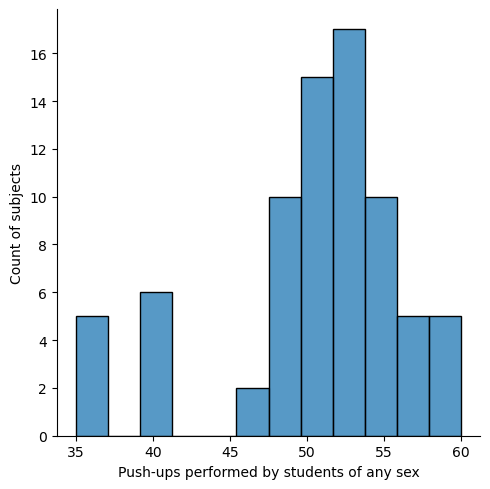

In [2]:
sb.displot(dataframe2['Push-ups'],label='Pushups',bins=12).set(xlabel='Push-ups performed by students of any sex', ylabel='Count of subjects')

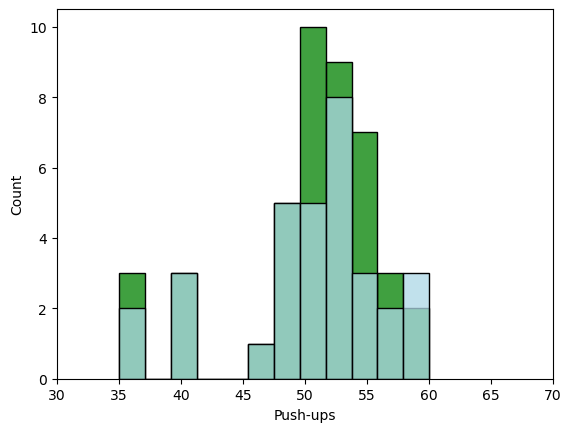

In [3]:
fig, ax = plt.subplots()

df_m=dataframe2[dataframe2['sex']=='H']
df_w=dataframe2[dataframe2['sex']=='M']

sb.histplot(df_m["Push-ups"], color="green",bins=12, kde=False, label='Male students')
sb.histplot(df_w["Push-ups"], color="lightblue", bins=12, kde=False, label='Female students')

ax.set_xlim([30,70])
plt.show()

<hr>

#### Example 1
E.g., considering the push-ups dataset, relative to the number of push-ups and the sex of the students. It is known that the number of push-ups is distributed according to a _normal_ distribution with variance $\sigma=7.5$ for the population. 

_Can it be assumed, considering a significance level of 5%, that the mean number of push-ups performed by students is 55?_

__Step I:__ The hypothesis is that the students in the sample can execute an average of 55 push-ups

__Step II:__ The corresponding formulation for $H_0$ and $H_a$ is expressed as follows:

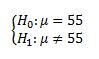

This is a two-tailed test for a normally-distributed sample, the $Z$ statistic is a suitable approach to test the null hypothesis

__Step III:__ The level of significance is set to 95\% (acceptable error of 0.05)

In [4]:
alpha=0.05

__Step IV:__ make the statistical decision: in this case the $t$-test is performed.

The parameters for the $t$-test are set, given

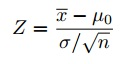

(The division by $\sqrt{n}$ corresponds to the size of the sample, $n>1$)

In [5]:
from scipy.stats import norm

mu_0=55
n = dataframe2["Push-ups"].count()
meanval = dataframe2["Push-ups"].mean()
stdev= (n/(n-1)) * dataframe2["Push-ups"].std()
print("Average: {}\nSample standard deviation: {} \nSample size: {}".format(meanval, stdev,n))

Average: 50.10666666666667
Sample standard deviation: 6.0595247346203855 
Sample size: 75


Now, it is possible to calculate the Student's $t$-test statistic.

In [6]:
Z=(meanval-mu_0)/(stdev/(np.sqrt(n)))

print ("Z statistic value: ",Z)

z_alpha_05=norm.ppf(1-alpha/2)
print("z_alpha_05: ",z_alpha_05)

if(abs(Z)<z_alpha_05):
    print("Null hypothesis cannot be rejected")
else:
    print("Null hypothesis is rejected")


Z statistic value:  -6.993536888528497
z_alpha_05:  1.959963984540054
Null hypothesis is rejected


Since $|Z|>z_{\alpha/2}$ (i.e. the $p$-value is smaller than 0.05), the null hypothesis is rejected

__Step V:__ So, it is possible to affirm, at a confidence level of 95%, that the mean value __is not__ 55.

___Question___: what about an hypothetical mean value  of 50?

In [7]:
from scipy.stats import norm

mu_0=50
n = dataframe2["Push-ups"].count()
meanval = dataframe2["Push-ups"].mean()
stdev= (n/(n-1)) * dataframe2["Push-ups"].std()
print("Average: {} \nSample standard deviation: {} \nSample size: {}".format(meanval, stdev,n))

Average: 50.10666666666667 
Sample standard deviation: 6.0595247346203855 
Sample size: 75


In [8]:
Z=(meanval-mu_0)/(stdev/np.sqrt(n))
print (Z)
z_alpha_05=norm.ppf(1-alpha/2)
print(z_alpha_05)

if(abs(Z)<z_alpha_05):
    print("Null hypothesis cannot be rejected")
else:
    print("Null hypothesis is rejected")


0.1524476705946302
1.959963984540054
Null hypothesis cannot be rejected


Since $|Z|<z_{\alpha/2}$ (i.e. the $p$-value is greater than 0.05), the null hypothesis is not rejected

__Step V:__ So, it is NOT possible to reject, at a significance level of 95%, that the mean value is 50.

__Remark__: Most research works nowadays state the problems conversely, using $H_a$ (or $H_1$) as the main research hypothesis, given that (according to Popper's falsiability) _scientific hypotheses_ cannot be proved true, but proved false (rejected). The concept of _statistical power_ is intended to fill such a gap. The _power_ of a statistical test is defined as $Pr(H_0$ is rejected $| H_a$ is true $)$, i.e. _the probability of correctly rejecting the null hypothesis, given the alternative hypothesis is true_.


<hr>

### Example 2

_Test, at a confidence level of 0.95, if the proportion of male students, $\pi_H$, is above 0.5, i.e. a share of the total population greater or equal than the 50 % of the population_

__Step I:__ The hypothesis is that the male students constitute at least the half of the class

__Step II:__ The corresponding formulation for $H_0$ and $H_a$ is expressed as follows:

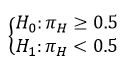

__Step III:__ The confidence level is set to 95\% (acceptable error of 0.05)

In [9]:
alpha=0.05

__Step IV:__ make the statistical decision: in this case the proportion $Z$ test is performed.

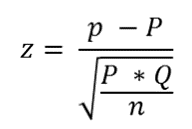

where $p$ is the observed (measured) proportion $$p=\frac{\textrm{male students}}{\textrm{population size}}$$$P$ is the hypothesized proportion of the interest group in the population ($P = 0.5$ in this case, correspoding to the null hypothesis $\pi_H\ge0.5$), $Q$ is the proportion of the complementary group and $n$ is the sample size.

For this example, the ___proportions_ztest___ module from Python ___statsmodels___ package is used:

In [10]:
from statsmodels.stats.proportion import proportions_ztest

data_size=len(dataframe2)
print("Sample size, n:", data_size)

males=filter(lambda s: s=="H", list(dataframe2["sex"]))
n_males=len(list(males))
print("Number of male students, p:", n_males)

null_hypothesis=0.5
stat, p_value = proportions_ztest(count=n_males, nobs=data_size, value=null_hypothesis, alternative='smaller')

print ("Z = {}, p-value= {}".format(stat, p_value))

if p_value < alpha:
    print ("Reject the null hypothesis - suggest the alternative hypothesis is true")
else:
    print ("Fail to reject the null hypothesis - it is not rejected")

Sample size, n: 75
Number of male students, p: 43
Z = 1.2840564131271743, p-value= 0.9004388912957051
Fail to reject the null hypothesis - it is not rejected


__Step V:__ The null hypothesis (the proposed proportion value for males is greater or equal than 0.5) is not rejected.

<hr>

### Example 3

_It is possible to asume, at a significance level of 0.05, that the mean number of flexions performed by male students is equal than the number of flexions performed by female students?_




To approach this problem, assuming that the variance $\sigma_1$ and $\sigma_2$ are close enough, it is necessary to use the (unpaired) _two sample_ t-test

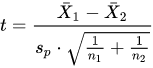

where

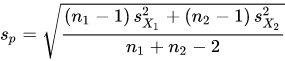


__Step I:__ The hypothesis is that both male and female students perform the same number of push-ups

__Step II:__ The corresponding formulation for $H_0$ and $H_1$ (alternative) is expressed as follows:

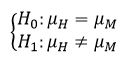


__Step III:__ The confidence level is set to 95\% (acceptable error of 0.05)

In [11]:
alpha=0.05

__Step IV:__ make the statistical decision: use the unpaired t-test, $n_H=n_1$, $n_M=n_2$, and $\bar{X}_1, \bar{X}_1, s_{X_1}$, and $s_{X_2}$ are unbiased estimators of $\mu_H, \mu_M, \sigma_H$ and $\sigma_M$, respectively::

In [12]:
from scipy import stats

males=dataframe2.loc[dataframe2["sex"]=="H"]
males.info()
Xbar_h=males["Push-ups"].mean()
std_h=males["Push-ups"].std()
n_h=len(males)
print(Xbar_h)

females=dataframe2.loc[dataframe2["sex"]=="M"]
females.info()
Xbar_m=females["Push-ups"].mean()
std_m=females["Push-ups"].std()
n_m=len(females)
print(Xbar_m)

t2, p2 = stats.ttest_ind_from_stats(Xbar_h,std_h, n_h, Xbar_m, std_m, n_m, equal_var=True, alternative="two-sided")
print("\nMean value for males: {}, mean value for females: {}".format(Xbar_h, Xbar_m))
print("\nValue of statistic t: {}, p-value: {}".format(t2, p2))

#Or, directly from the data:
t2_n, p2_b = stats.ttest_ind(males["Push-ups"], females["Push-ups"], equal_var=False)
print(f"{t2_n}, {p2_b}")

if p2 > alpha:
    print ("Fail to reject the null hypothesis")
else:
    print ("Reject the null hypothesis - suggest the alternative hypothesis is true")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 74
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Push-ups  43 non-null     int64 
 1   sex       43 non-null     object
 2   sport     43 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB
50.06976744186046
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 2 to 73
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Push-ups  32 non-null     int64 
 1   sex       32 non-null     object
 2   sport     32 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ KB
50.15625

Mean value for males: 50.06976744186046, mean value for females: 50.15625

Value of statistic t: -0.0615396368330006, p-value: 0.9510976278795403
-0.06093288692403682, 0.9516014460081048
Fail to reject the null hypothesis


__Step V:__ Since $p > \alpha$, it is NOT rejected the hypothesis that the mean values for male and female student performance (number of pushups) are equal.